In [1]:
from scviz import pAnnData as pAnnData
from scviz import plotting as scplt
from scviz import utils as scutils
import scanpy as sc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks')

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

In [3]:
obs_columns = ['name','load','enzyme','date','instrument','acquisition','method','gradient','replicate']

pdata = pAnnData.import_diann('report.tsv', obs_columns=obs_columns)

--------------------------
Starting import...
--------------------------
Importing from report.tsv
Number of files: 10
Number of proteins: 7372
Number of files: 10
Number of peptides: 51510
RS matrix successfully computed
Setting rs matrix with dimensions (51510, 7372)
Transposing rs matrix to protein x peptide format
pAnnData object created. Use `print(pdata)` to view the object.


In [5]:
pdata

pAnnData object
Protein (shape: 10 files by 7372 proteins)
obs: name, load, enzyme, date, instrument...
var: First.Protein.Description, Genes
obsm: 
layers: 

Peptide (shape: 10 files by 51510 peptides)
obs: name, load, enzyme, date, instrument...
var: Genes, Protein.Group, Precursor.Charge, Modified.Sequence, Stripped.Sequence
layers: 

RS (shape: 7372 proteins by 51510 peptides)


In [10]:
unique_peptides_mask = pdata.rs.toarray().sum(axis=0) == 1

unique_peptides_mask

array([ True,  True,  True, ...,  True,  True,  True])

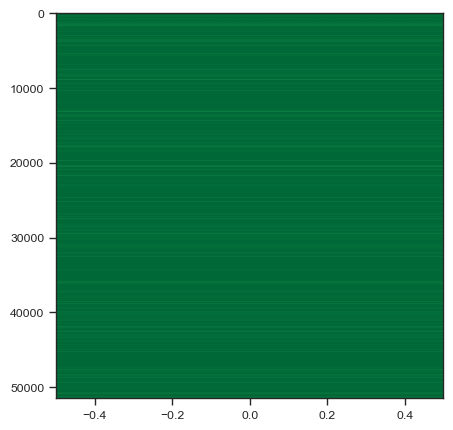

In [15]:
# plot plot of unique peptides mask, where True is green and False is red
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.imshow(unique_peptides_mask.reshape(-1,1), cmap='RdYlGn', aspect='auto')
plt.show()

In [20]:
rs_matrix = pdata.rs.toarray()

# Identify unique peptides (peptides that map to only one protein)
unique_peptides_mask = rs_matrix.sum(axis=0) == 1

# Filter pdata.pep to include only unique peptides
unique_pep_matrix = pdata.pep.X[:, unique_peptides_mask]

# Get the mapping of unique peptides to proteins
unique_pep_to_prot = rs_matrix[:, unique_peptides_mask]

# Initialize a matrix to store the count of unique peptides per protein per file
unique_pep_count_matrix = np.zeros((pdata.prot.X.shape[0], pdata.prot.X.shape[1]))

# Count unique peptides per protein per file
for protein_idx in range(unique_pep_to_prot.shape[0]):
    # Get the indices of unique peptides mapped to this protein
    unique_peptides_for_protein = unique_pep_to_prot[protein_idx, :] == 1
    
    # Sum the peptide abundances for these unique peptides across files
    unique_pep_count_matrix[protein_idx, :] = unique_pep_matrix[unique_peptides_for_protein, :].sum(axis=0)

# Convert the result to a DataFrame for better readability
unique_pep_count_df = pd.DataFrame(unique_pep_count_matrix, index=pdata.prot.index, columns=pdata.prot.columns)


IndexError: boolean row index has incorrect length: 51094 instead of 10